# James Liuらのσとリダンダンシーの関係をプロットで勉強中

## まずは強度がsigma_totalに与える影響を見た

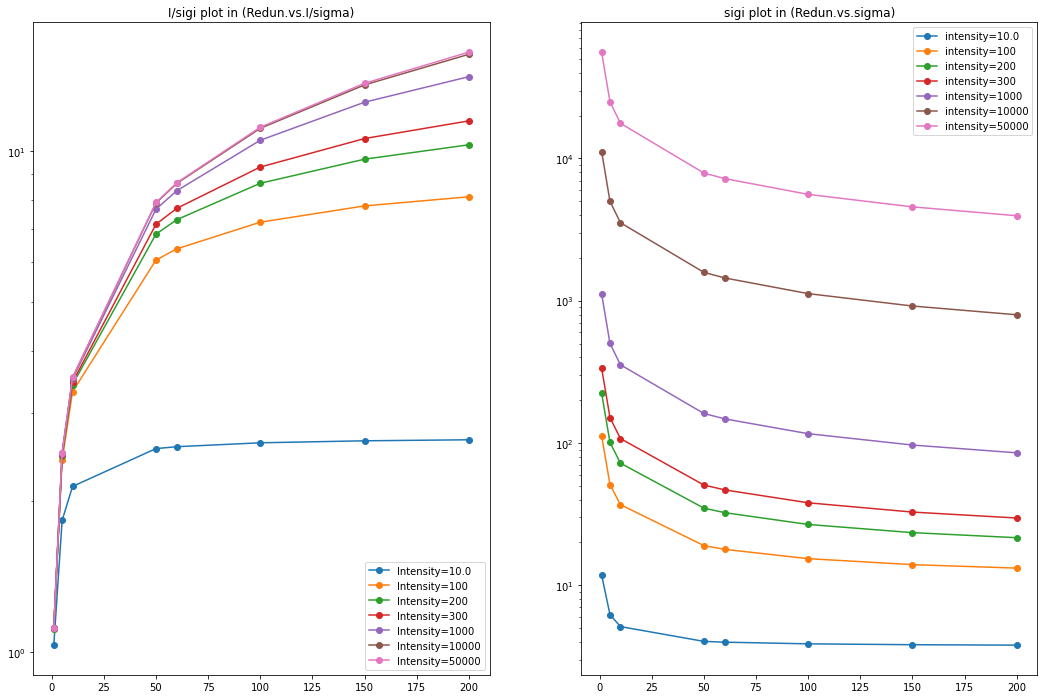

In [117]:
import math
import numpy as np
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

class ErrorModel:
    def __init__(self):
        self.test=3.0
        self.gain = 1.0

    def estimateSigma(self, Is, Ibg, m_bg_pix, n_pk_pix, k, a, n_time=1):
        # sigma_total^2 = sigma_Is^2 + m * sigma_Ins^2
        sigma_Is2 = self.gain * (Is +  Ibg + (float(m_bg_pix/n_pk_pix)*Ibg))
        sigma_Ins = m_bg_pix * np.power(k/a,2.0) * np.power(Is,2.0) / float(n_time)

        sigma_total2 = sigma_Is2 + sigma_Ins
        sigma_total = np.sqrt(sigma_total2)

        return sigma_total

if __name__=="__main__":
    em = ErrorModel()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False,figsize=(18.0, 12.0))

    intensity=100.0
#     for intensity in [1.0, 10.0, 100.0, 1000.0]:
#     for intensity in [1.0, 10.0, 1000, 10000]:
    for intensity in [10.0, 100, 200, 300, 1000, 10000, 50000]:
        i_bg = np.sqrt(intensity)
        xa=[]
        ya=[]
        za=[]
        for ntime in [1,5,10,50,60,100,150,200]:
            sigma=em.estimateSigma(intensity, i_bg, 5, 25, 1, 2.5, n_time=ntime)
            ios=intensity/sigma
            xa.append(ntime)
            ya.append(ios)
            za.append(sigma)
        # Plotting
        nxa=np.array(xa)
        nya=np.array(ya)
        title = "Intensity=%s" % intensity
        axes[0].plot(nxa,nya,'o-', label=title, )
        axes[0].set_yscale("log")
        axes[0].legend(loc="lower right")
        graph_title = "I/sigi plot in (Redun.vs.I/sigma)"        
        axes[0].set_title(graph_title)

    for intensity in [10.0, 100, 200, 300, 1000, 10000, 50000]:
        i_bg = np.sqrt(intensity)
        xa=[]
        ya=[]
        za=[]
        for ntime in [1,5,10,50,60,100,150,200]:
            sigma=em.estimateSigma(intensity, i_bg, 5, 25, 2, 4, n_time=ntime)
            ios=intensity/sigma
            xa.append(ntime)
            ya.append(sigma)
        # Plotting
        nxa=np.array(xa)
        nya=np.array(ya)
        title = "intensity=%s" % intensity
        axes[1].plot(nxa,nya,'o-',label=title, )
        axes[1].set_yscale("log")
        axes[1].legend(loc="upper right")
        graph_title = "sigi plot in (Redun.vs.sigma)"        
        axes[1].set_title(graph_title)


# まとめ
- k=1.0 a=2.5 で固定、ピークの強度を振って I/sigIと sigIの挙動をプロット（それぞれ左、右）
- 強度が小さいと、急峻に立ち上がってプラトー領域に達するまでのマージ数が少ない
- sigmaの数値は絶対値が強度によって異なるが、形状としては似ている

# 次に各パラメータが与える影響を強度を固定して見てみた

## 次にピークとバックグラウンドのピクセル数について

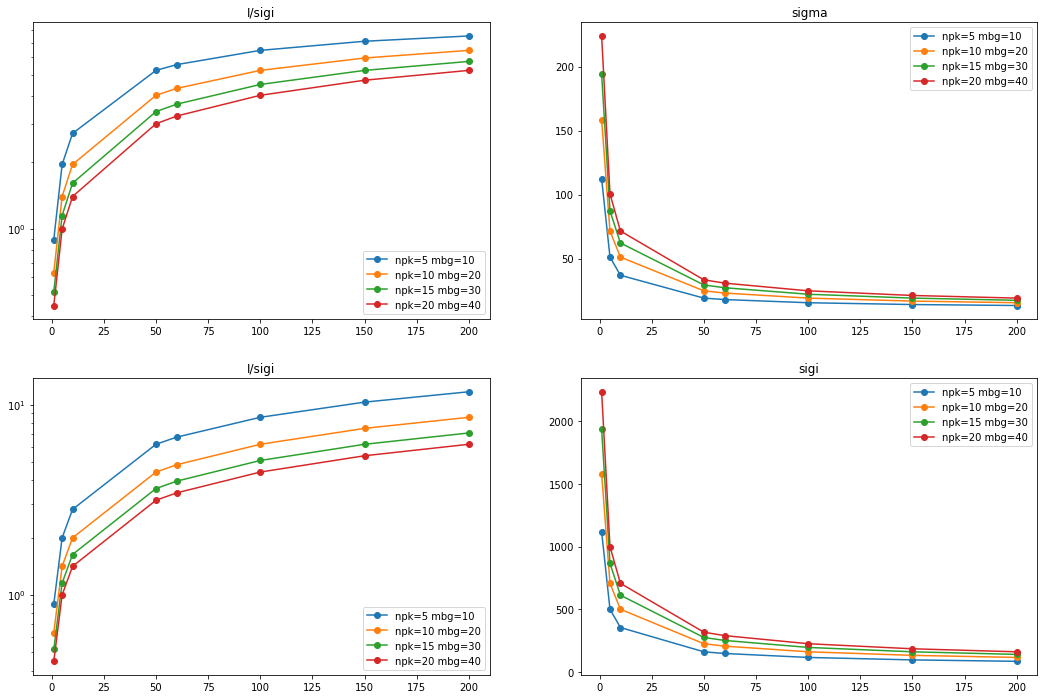

In [91]:
import math
import numpy as np
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

class ErrorModel:
    def __init__(self):
        self.test=3.0
        self.gain = 1.0

    def estimateSigma(self, Is, Ibg, m_bg_pix, n_pk_pix, k, a, n_time=1):
        # sigma_total^2 = sigma_Is^2 + m * sigma_Ins^2
        sigma_Is2 = self.gain * (Is +  Ibg + (float(m_bg_pix/n_pk_pix)*Ibg))
        sigma_Ins = m_bg_pix * np.power(k/a,2.0) * np.power(Is,2.0) / float(n_time)

        sigma_total2 = sigma_Is2 + sigma_Ins
        sigma_total = np.sqrt(sigma_total2)

        return sigma_total

if __name__=="__main__":
    em = ErrorModel()
    
    fig, axes = plt.subplots(nrows=2, ncols=2, sharey=False,figsize=(18.0, 12.0))

    intensity=100.0
    npk_list = [5,10,15,20]
    
    for npk in npk_list:
        mbg=npk * 2
        
        i_bg = np.sqrt(intensity)
        xa=[]
        ya=[]
        za=[]
        for ntime in [1,5,10,50,60,100,150,200]:
            sigma=em.estimateSigma(intensity, i_bg, npk, mbg, 2, 4, n_time=ntime)
            ios=intensity/sigma
#             print(intensity, ntime, sigma, ios)
            xa.append(ntime)
            ya.append(ios)
            za.append(sigma)
        # Plotting
        nxa=np.array(xa)
        nya=np.array(ya)
        title = "npk=%d mbg=%s" % (npk,mbg)
        axes[0,0].plot(nxa,nya,'o-', label=title, )
        axes[0,0].set_yscale("log")
        axes[0,0].legend(loc="lower right")
        axes[0,0].set_title("I/sigi")
        
        # Plotting
        nza=np.array(za)
        axes[0,1].plot(nxa,nza,'o-', label=title)
        axes[0,1].legend(loc="upper right")
        axes[0,1].set_title("sigma")

    intensity=1000.0
    for npk in npk_list:
        mbg=npk * 2
        
        i_bg = np.sqrt(intensity)
        xa=[]
        ya=[]
        za=[]
        for ntime in [1,5,10,50,60,100,150,200]:
            sigma=em.estimateSigma(intensity, i_bg, npk, mbg, 2, 4, n_time=ntime)
            ios=intensity/sigma
#             print(intensity, ntime, sigma, ios)
            xa.append(ntime)
            ya.append(ios)
            za.append(sigma)
        # Plotting
        nxa=np.array(xa)
        nya=np.array(ya)
        title = "npk=%d mbg=%s" % (npk,mbg)
        axes[1,0].plot(nxa,nya,'o-', label=title, )
        axes[1,0].set_yscale("log")
        axes[1,0].legend(loc="lower right")
        axes[1,0].set_title("I/sigi")
        
        # Plotting
        nza=np.array(za)
        axes[1,1].plot(nxa,nza,'o-', label=title)
        axes[1,1].legend(loc="upper right")
        axes[1,1].set_title("sigi")


### 結果
- 形状として特段変わったようには見えない？
- ピークのサイズが小さくなるとマージ数による<I/sigI>が高くなる = sigIが小さくなる

# 一緒にプロットせんとわからん？

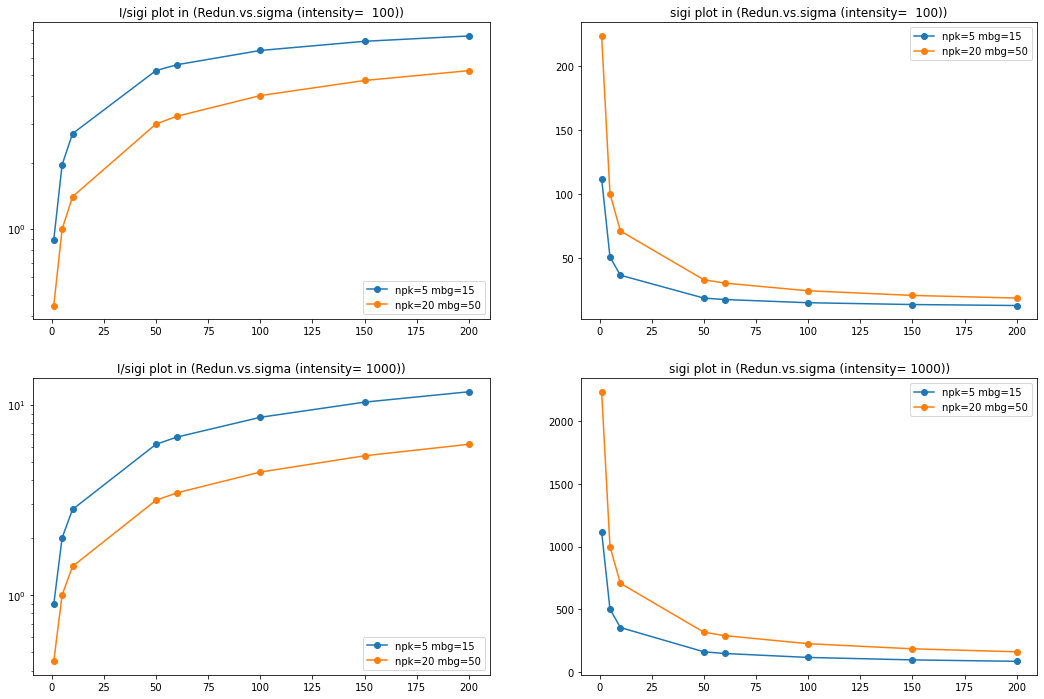

In [94]:
import math
import numpy as np
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

class ErrorModel:
    def __init__(self):
        self.test=3.0
        self.gain = 1.0

    def estimateSigma(self, Is, Ibg, m_bg_pix, n_pk_pix, k, a, n_time=1):
        # sigma_total^2 = sigma_Is^2 + m * sigma_Ins^2
        sigma_Is2 = self.gain * (Is +  Ibg + (float(m_bg_pix/n_pk_pix)*Ibg))
        sigma_Ins = m_bg_pix * np.power(k/a,2.0) * np.power(Is,2.0) / float(n_time)

        sigma_total2 = sigma_Is2 + sigma_Ins
        sigma_total = np.sqrt(sigma_total2)

        return sigma_total

if __name__=="__main__":
    em = ErrorModel()
    
    fig, axes = plt.subplots(nrows=2, ncols=2, sharey=False,figsize=(18.0, 12.0))

    intensity=100.0
    pk_bg_list = [(5,15), (20, 50)]
    
    for npk,mbg in pk_bg_list:
        i_bg = np.sqrt(intensity)
        xa=[]
        ya=[]
        za=[]
        for ntime in [1,5,10,50,60,100,150,200]:
            sigma=em.estimateSigma(intensity, i_bg, npk, mbg, 2, 4, n_time=ntime)
            ios=intensity/sigma
#             print(intensity, ntime, sigma, ios)
            xa.append(ntime)
            ya.append(ios)
            za.append(sigma)
        # Plotting
        nxa=np.array(xa)
        nya=np.array(ya)
        title = "npk=%d mbg=%s" % (npk,mbg)
        axes[0,0].plot(nxa,nya,'o-', label=title, )
        axes[0,0].set_yscale("log")
        axes[0,0].legend(loc="lower right")
        graph_title = "I/sigi plot in (Redun.vs.sigma (intensity=%5d))" % intensity
        axes[0,0].set_title(graph_title)
        
        # Plotting
        nza=np.array(za)
        axes[0,1].plot(nxa,nza,'o-', label=title)
        axes[0,1].legend(loc="upper right")
        graph_title = "sigi plot in (Redun.vs.sigma (intensity=%5d))" % intensity
        axes[0,1].set_title(graph_title)

    intensity=1000.0
    for npk,mbg in pk_bg_list:
        i_bg = np.sqrt(intensity)
        xa=[]
        ya=[]
        za=[]
        for ntime in [1,5,10,50,60,100,150,200]:
            sigma=em.estimateSigma(intensity, i_bg, npk, mbg, 2, 4, n_time=ntime)
            ios=intensity/sigma
#             print(intensity, ntime, sigma, ios)
            xa.append(ntime)
            ya.append(ios)
            za.append(sigma)
        # Plotting
        nxa=np.array(xa)
        nya=np.array(ya)
        title = "npk=%d mbg=%s" % (npk,mbg)
        axes[1,0].plot(nxa,nya,'o-', label=title, )
        axes[1,0].set_yscale("log")
        axes[1,0].legend(loc="lower right")
#         graph_title = "Redun.vs.sigma (intensity=%5d)" % intensity
        graph_title = "I/sigi plot in (Redun.vs.sigma (intensity=%5d))" % intensity        
        axes[1,0].set_title(graph_title)
        
        # Plotting
        nza=np.array(za)
        axes[1,1].plot(nxa,nza,'o-', label=title)
        axes[1,1].legend(loc="upper right")
        graph_title = "sigi plot in (Redun.vs.sigma (intensity=%5d))" % intensity        
        axes[1,1].set_title(graph_title)


### 結果
- 形状としてはやはりあまり変わっているように見えない
- peak pixelの数やbackground pixelの数では形状は大きく左右されない（低強度でも高強度でも）
- 変曲点を求めたりするとわかりやすいのかも知れない
- ピークのピクセル数が増えると測定誤差が大きくなる（青とオレンジ）
- 誤差が小さくなる効果はピークやバックグラウンドのピクセル数が多い方が顕著である（結構大事な特徴かも）

# うすうす気づいていはいたが両項の重み付け A, k に相当依存するのでは？

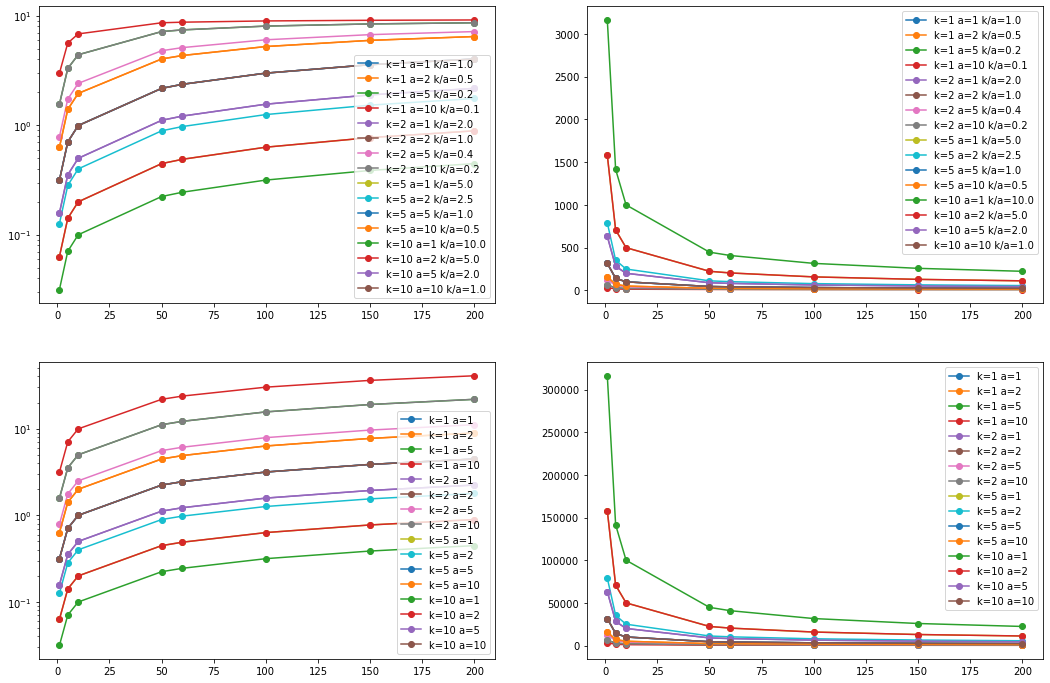

In [95]:
import math
import numpy as np
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

class ErrorModel:
    def __init__(self):
        self.test=3.0
        self.gain = 1.0

    def estimateSigma(self, Is, Ibg, m_bg_pix, n_pk_pix, k, a, n_time=1):
        # sigma_total^2 = sigma_Is^2 + m * sigma_Ins^2
        sigma_Is2 = self.gain * (Is +  Ibg + (float(m_bg_pix/n_pk_pix)*Ibg))
        sigma_Ins = m_bg_pix * np.power(k/a,2.0) * np.power(Is,2.0) / float(n_time)

        sigma_total2 = sigma_Is2 + sigma_Ins
        sigma_total = np.sqrt(sigma_total2)

        return sigma_total

if __name__=="__main__":
    em = ErrorModel()
    
    fig, axes = plt.subplots(nrows=2, ncols=2, sharey=False,figsize=(18.0, 12.0))

    intensity=100.0
    npk = 10
    mbg = 25
    
    klist = [1,2,5,10]
    alist = [1,2,5,10]

    for k in klist:
        for a in alist:
            i_bg = np.sqrt(intensity)
            xa=[]
            ya=[]
            za=[]
            for ntime in [1,5,10,50,60,100,150,200]:
                sigma=em.estimateSigma(intensity, i_bg, npk, mbg, k, a, n_time=ntime)
                ios=intensity/sigma
                xa.append(ntime)
                ya.append(ios)
                za.append(sigma)
            # Plotting
            nxa=np.array(xa)
            nya=np.array(ya)
            title = "k=%d a=%s k/a=%s" % (k, a, k/a)
            axes[0,0].plot(nxa,nya,'o-', label=title, )
            axes[0,0].set_yscale("log")
            axes[0,0].legend(loc="lower right")

            # Plotting
            nza=np.array(za)
            axes[0,1].plot(nxa,nza,'o-', label=title)
            axes[0,1].legend(loc="upper right")

    intensity=10000.0
    for k in klist:
        for a in alist:
            i_bg = np.sqrt(intensity)
            xa=[]
            ya=[]
            za=[]
            for ntime in [1,5,10,50,60,100,150,200]:
                sigma=em.estimateSigma(intensity, i_bg, npk, mbg, k, a, n_time=ntime)
                ios=intensity/sigma
                xa.append(ntime)
                ya.append(ios)
                za.append(sigma)
            # Plotting
            nxa=np.array(xa)
            nya=np.array(ya)
            title = "k=%d a=%s" % (k, a)
            axes[1,0].plot(nxa,nya,'o-', label=title, )
            axes[1,0].set_yscale("log")
            axes[1,0].legend(loc="lower right")

            # Plotting
            nza=np.array(za)
            axes[1,1].plot(nxa,nza,'o-', label=title)
            axes[1,1].legend(loc="upper right")


## 変更
- kを変更すると絶対値が変わる
- aを変更すると絶対値が変わる
- k/a が小さいとS/N比が高い
- k/a が大きいとS/N比が低い
- マージしたときのインパクトはk/aが大きいときのほうが大きい
### k/aが大きいの意味とは？
K: a proportinality constant
A: a factor which is related to the half-width of a reflection spot

K自体は任意の数値なので変更しないで検討をしたほうが良さそう。

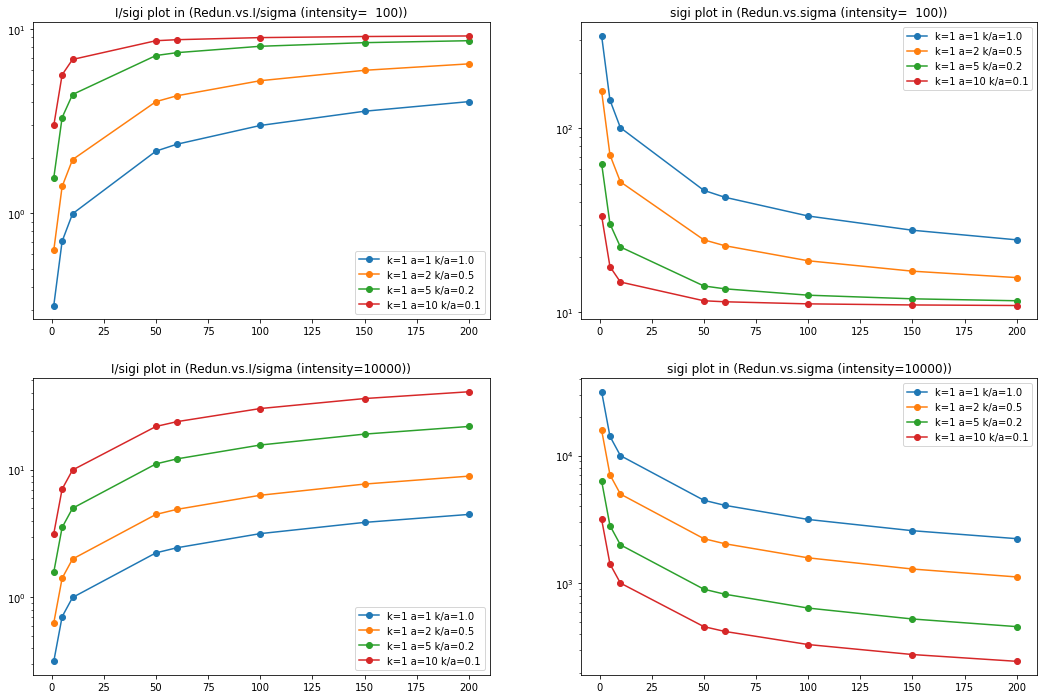

In [108]:
import math
import numpy as np
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

class ErrorModel:
    def __init__(self):
        self.test=3.0
        self.gain = 1.0

    def estimateSigma(self, Is, Ibg, m_bg_pix, n_pk_pix, k, a, n_time=1):
        # sigma_total^2 = sigma_Is^2 + m * sigma_Ins^2
        sigma_Is2 = self.gain * (Is +  Ibg + (float(m_bg_pix/n_pk_pix)*Ibg))
        sigma_Ins = m_bg_pix * np.power(k/a,2.0) * np.power(Is,2.0) / float(n_time)

        sigma_total2 = sigma_Is2 + sigma_Ins
        sigma_total = np.sqrt(sigma_total2)

        return sigma_total

if __name__=="__main__":
    em = ErrorModel()
    
    fig, axes = plt.subplots(nrows=2, ncols=2, sharey=False,figsize=(18.0, 12.0))

    intensity=100.0
    npk = 10
    mbg = 25
    
    k=1.0

    alist = [1,2,5,10]
    ncol=0
    nrow=0
    
    for intensity in [100, 10000]:
        nrow=0
        for a in alist:
            i_bg = np.sqrt(intensity)
            xa=[]
            ya=[]
            za=[]
            for ntime in [1,5,10,50,60,100,150,200]:
                sigma=em.estimateSigma(intensity, i_bg, npk, mbg, k, a, n_time=ntime)
                ios=intensity/sigma
                xa.append(ntime)
                ya.append(ios)
                za.append(sigma)
            # Plotting
            nxa=np.array(xa)
            nya=np.array(ya)
            title = "k=%d a=%s k/a=%s" % (k, a, k/a)
            axes[ncol,nrow].plot(nxa,nya,'o-', label=title, )
            axes[ncol, nrow].set_yscale("log")
#             axes[ncol, nrow].set_xscale("log")
            axes[ncol, nrow].legend(loc="lower right")
            graph_title = "I/sigi plot in (Redun.vs.I/sigma (intensity=%5d))" % intensity
            axes[ncol, nrow].set_title(graph_title)

            # Plotting
            nza=np.array(za)
            axes[ncol, nrow+1].plot(nxa,nza,'o-', label=title)
            axes[ncol, nrow+1].legend(loc="upper right")
            graph_title = "sigi plot in (Redun.vs.sigma (intensity=%5d))" % intensity
            axes[ncol, nrow+1].set_title(graph_title)
            axes[ncol, nrow+1].set_yscale("log")
#             axes[ncol, nrow+1].set_xscale("log")
            
        ncol+=1


# Summary
- kを定数としてaを変数としたとき
- aが大きければ、すなわち、反射の幅が大きければ、S/Nは小さくなる
- mergeによるインパクトが大きいのはaが大きいもの
- 強度の違いによってプロットの形状に変化はない→逆にいうと絶対値のインパクトは大きいという意味でもある